**Institution Name:**   Moringa School

**Course Pursued:**     Data Science

**Phase/ Level:**       Three (3)

**Project done by:**    Boniface Kimondo Njeri

**TM Name:**            George Kamundia

# Early Detection of Imminent SyriaTel Churn Through Predictive Signal Analysis
----

# Introduction
This report details the end-to-end development of a machine learning classifier aimed at predicting customer churn for SyriaTel. The goal is to analyze usage patterns, service attributes, and customer behaviors to forecast whether a customer is likely to stop using SyriaTel services. Accurate predictions empower the business to intervene proactively—tailoring offers, support, or incentives to retain valuable customers before they exit.

# Background of the Project
In today’s highly competitive telecommunications market, customer retention plays a critical role in sustaining profitability. Studies have shown that acquiring a new customer can cost five to ten times more than retaining an existing one. For companies like SyriaTel, minimizing customer churn—when users discontinue their service—is not just a technical challenge but a strategic imperative.

This project focuses on developing a machine learning-based churn prediction model to help SyriaTel identify customers at high risk of leaving. By flagging potential churners early, the company can implement targeted retention strategies, reduce revenue loss, and enhance customer satisfaction.

# Project Objectives
**General Objective**
To build a predictive system that identifies customers likely to churn, thereby supporting SyriaTel in making timely, data-driven retention decisions.

**Specific Objectives**
1. Develop a Binary Classification Model: Use customer data to classify users as likely to churn (True) or not (False).

2. Support Retention Planning: Leverage model outputs to inform and optimize proactive customer retention strategies.

3. Generate Business Insights: Analyze feature importance and model behavior to draw actionable conclusions that can influence service improvement and marketing approaches.

## Importing Required Libraries

In this section, we import the essential Python libraries required for data analysis, visualization, preprocessing, modeling, and evaluation.

### Core Libraries:
- **pandas**: Used for loading, manipulating, and analyzing structured data (e.g., DataFrames).
- **numpy**: Provides support for numerical operations, especially array-based computations.

### Visualization:
- **matplotlib.pyplot**: The foundational library for plotting charts and visualizations.
- **seaborn**: Built on top of matplotlib, provides more sophisticated and attractive statistical visualizations.

### Machine Learning & Preprocessing (scikit-learn):
- **train_test_split**: Splits the dataset into training and test subsets.
- **LabelEncoder**: Converts categorical labels into numerical values.
- **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance.
- **RandomForestClassifier**: An ensemble learning algorithm based on decision trees for classification tasks.
- **classification_report**, **confusion_matrix**, **accuracy_score**: Tools to evaluate the performance of classification models.


In [38]:
# Importing essential libraries for data handling, visualization, and modeling

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Machine learning algorithm
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Configure matplotlib for inline plotting in notebooks
%matplotlib inline

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

print("All libraries imported successfully.")

All libraries imported successfully.


## Loading the Dataset & Initial Inspection

In this step, we load the dataset into a **Pandas DataFrame** from a CSV file and preview the first few records.

### This aided:
- To **understand the structure** of the dataset (rows, columns).
- To identify **key features**, column names, and possible data types.
- To quickly spot any **obvious data quality issues**, such as missing values or inconsistent formatting.

**File Used**: `bigml_59c28831336c6604c800002a.csv`


In [39]:
# Load the dataset into a DataFrame
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

# Display the first 5 rows to examine the structure
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Understanding the Dataset Structure & Statistical Summary

To better understand the dataset, I conducted two key inspections:

### Dataset Structure: `df.info()`
- Displays all column names, data types, and the number of non-null (non-missing) values.
- Helped identify:
  - Which features are **categorical vs numerical**.
  - Potential **missing data** that may need cleaning.
  - Overall **shape and memory footprint** of the DataFrame.

### Statistical Summary: `df.describe()`
- Generates descriptive statistics for **numeric columns**, such as:
  - **Mean**, **standard deviation**, **minimum**, **maximum**, and **quartile values**.
- This was Useful for:
  - Detecting **outliers or anomalies**.
  - Understanding the **distribution** and **scale** of features.
  - Informing **scaling** or **normalization** decisions before model training.



In [40]:
# Display dataset structure: column names, data types, and non-null counts
print("Dataset Structure info:\n")
df.info()

# Display statistical summary of numeric columns
print("\n Dataset Structure describe:")
df.describe()

#Display the null values in the dataset
print("\n Null values in each column:")
print(df.isnull().sum())    

Dataset Structure info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night cal

# Output Review: 
The initial output shows we have 3,333 entries and 20 columns. There are no null values, which is excellent. Our target variable, churn, is of type bool (True/False). All feature names are clear, but we should standardize the column formatting for consistency.

## Data Cleaning & Preprocessing

A clean and well-prepared dataset is essential for building an accurate machine learning model. In this phase, I:

### 1. Standardized Column Names
- Converted column names to `snake_case` for consistency and easier access.

### 2. Drop Irrelevant or Non-Predictive Columns
- Features like `phone_number`, `state`, and `area_code` are either unique identifiers or unlikely to contribute meaningfully to the model’s predictive power.

### 3. Convert Binary Categorical Variables
- Converted `"yes"`/`"no"` strings in `international_plan` and `voice_mail_plan` columns into binary integers (`1` for "yes", `0` for "no").

### 4. Encode Target Variable
- The target column `churn` was converted from boolean to integer format for compatibility with machine learning algorithms.

### 5. Visualize Class Balance
- I Used a count plot to visualize whether the dataset is balanced across the target classes (`churned` vs `not churned`).


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Standardize column names to snake_case
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Drop irrelevant columns
df.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

# Convert binary categorical features to numerical (0/1)
for col in ['international_plan', 'voice_mail_plan']:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# Convert target variable to integer
df['churn'] = df['churn'].astype(int)

# Confirm transformations
print("Cleaned column names:", df.columns.tolist())
print("\n Data types after conversion:")
print(df[['international_plan', 'voice_mail_plan', 'churn']].info())


Cleaned column names: ['account_length', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']

 Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   international_plan  3333 non-null   int64
 1   voice_mail_plan     3333 non-null   int64
 2   churn               3333 non-null   int32
dtypes: int32(1), int64(2)
memory usage: 65.2 KB
None


## Exploratory Data Analysis (EDA)

The goal of EDA is to uncover meaningful patterns, trends, and relationships within the dataset—especially factors that influence customer churn. This step guides feature selection, model design, and business decisions.

I begin by analyzing the target variable (`churn`) and then examined how key features interacted with churn behavior.

### Analyzing the Target Variable: `churn`

Before diving into predictors, I examined the distribution of the target variable to understand class balance.

- **Why this matters:** A highly imbalanced dataset can mislead performance metrics like accuracy.
- **Goal:** To determine whether the number of churned vs. retained customers is balanced, and quantify the churn rate.


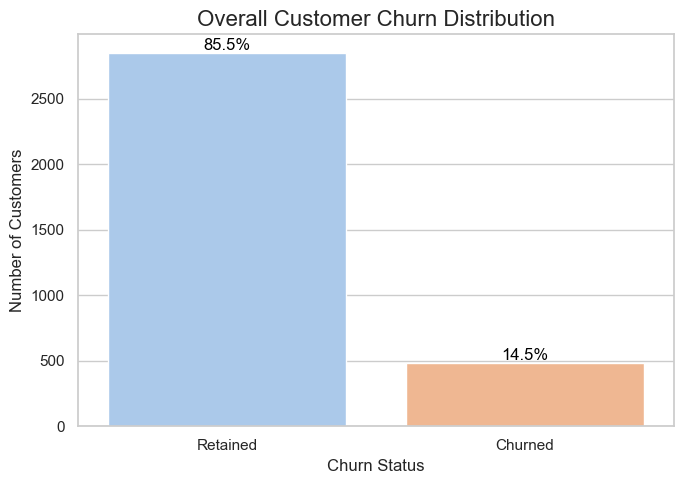

In [42]:
import os

# Create a folder named "visuals" to save all plots
if not os.path.exists("visuals"):
    os.makedirs("visuals")
    
# Visualize the distribution of the target variable 'churn'
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='churn', data=df, palette='pastel')
plt.title('Overall Customer Churn Distribution', fontsize=16)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Retained', 'Churned'])

# Annotate bars with percentage values
total = len(df)
for p in ax.patches:
    percentage = f'{(p.get_height() / total) * 100:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, color='black')

# Save the figure
plt.tight_layout()
plt.savefig("visuals/churn_distribution.png")
plt.show()


**Finding:**
The dataset was imbalanced, with only **~14.5%** of customers having churned. This is a critical insight. A naïve model that predicts "no churn" for every user would still achieve high accuracy (~85.5%), but it would be useless in identifying actual churners.

Therefore, I had to evaluate the models using the following metrics instead of relying on accuracy alone:
- **Precision**
- **Recall**
- **F1-score**
- **AUC-ROC**




## Churn vs. Customer Service Calls

I explored how often customers contact customer service and how this correlates with churn. Intuitively, frequent service calls may indicate dissatisfaction a possible churn trigger.


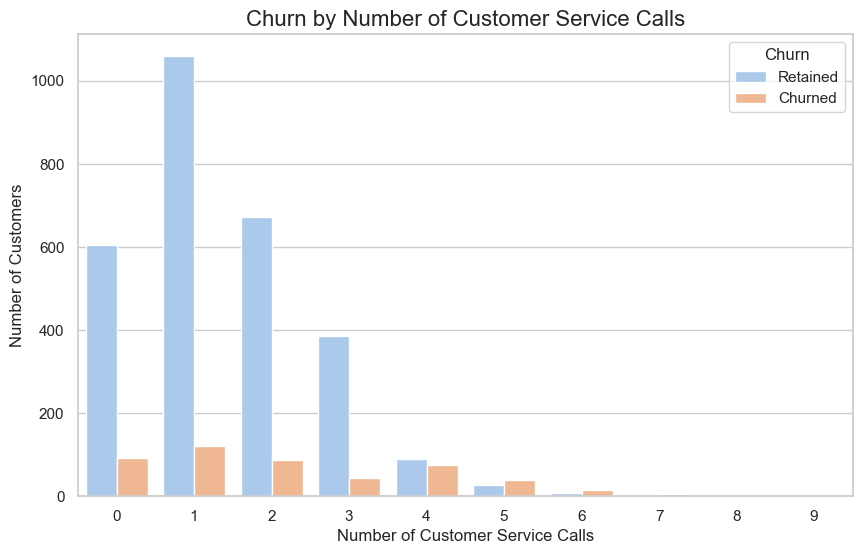

In [43]:
# Convert churn column to string to avoid legend errors
df['churn'] = df['churn'].astype(str)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='customer_service_calls', hue='churn', data=df, palette='pastel')

# Add title and labels
plt.title('Churn by Number of Customer Service Calls', fontsize=16)
plt.xlabel('Number of Customer Service Calls', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Custom legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Retained' if lbl == '0' else 'Churned' for lbl in labels], title='Churn')

plt.show()


## Churn vs. International Plan

I examined whether having an international calling plan influenced churn. It’s plausible that dissatisfaction with international service quality or pricing could impact customer retention.


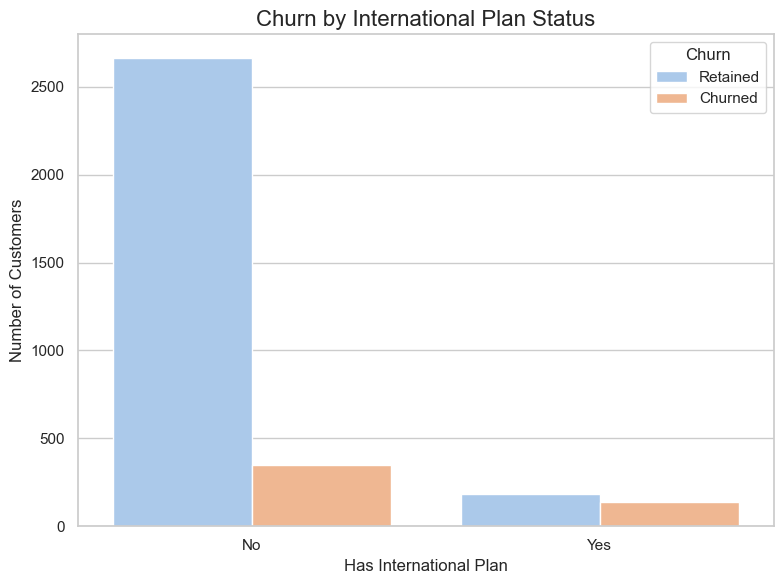

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='international_plan', hue='churn', data=df, palette='pastel')
plt.title('Churn by International Plan Status', fontsize=16)
plt.xlabel('Has International Plan', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Churn', labels=['Retained', 'Churned'])

# Save the figure
plt.tight_layout()
plt.savefig("visuals/churn_vs_international_plan.png")
plt.show()


### **Findings:**

Customers with an international plan had a markedly higher churn rate. This could indicate:
- Poor perceived value of the plan
- Hidden costs or unexpected billing
- Service quality issues

This segment needs urgent review. Offering better value or enhancing service quality for international callers could improve retention.


## **Model Development and Training**

I constructed and trained a machine learning model to predict customer churn. Using the Random Forest algorithm, the model learns from historical data to identify patterns that distinguish churned customers from retained ones. The dataset was first split into training and testing subsets, followed by feature scaling to standardize input values. Once prepared, the model was trained on the training data and later evaluated on the test set to assess its predictive performance.
Steps followed are:

**Step 1: Splitting Features and Target Variable**

I began by splitting the dataset into:
Features (X): All columns except churn,
Target (y): The churn column, which we are trying to predict.

In [45]:
# Separate features and target variable
X = df.drop('churn', axis=1)
y = df['churn']


**Step 2: Train-Test Split**

We split the dataset into:
Training set (70%): Used to train the model.
Testing set (30%): Used to evaluate how well the model performs on unseen data,
A fixed random_state ensures reproducibility.

In [46]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


**Step 3: Feature Scaling (Standardization)**

Standardizing the features ensures that each one contributes equally to the model. It transforms the data to have:

A mean of 0

A standard deviation of 1

This step is especially important for algorithms sensitive to feature magnitude.

In [47]:
from sklearn.preprocessing import StandardScaler

# Initialize and apply standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on train, transform train
X_test = scaler.transform(X_test)        # Transform test only


**Step 4: Building the Model (Random Forest)**
We use a Random Forest Classifier, which builds multiple decision trees (100 in this case) and averages their predictions. This ensemble method improves generalization and reduces overfitting.

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Step 5: Encoding Categorical Features**

Before training  I converted categorical columns such as "international plan and Voice Plan" into numeric format using Label Encoding, as most machine learning models do not accept string inputs:




In [51]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
df['international_plan'] = LabelEncoder().fit_transform(df['international_plan'])
df['voice_mail_plan'] = LabelEncoder().fit_transform(df['voice_mail_plan'])


**Step 6: Making Predictions**

After the model was trained, I used it to make predictions on the test set.

In [52]:
# Predict churn on test data
y_pred = model.predict(X_test)


**Step 7: Model Evaluation**

I evaluated the model performance using multiple metrics:

Accuracy Score: Overall correct predictions.

Confusion Matrix: Breakdown of actual vs. predicted.

Classification Report: Precision, recall, F1-score.

These metrics are essential, especially since churn is an imbalanced problem.

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       857
           1       0.94      0.71      0.81       143

    accuracy                           0.95      1000
   macro avg       0.95      0.85      0.89      1000
weighted avg       0.95      0.95      0.95      1000

Confusion Matrix:
 [[851   6]
 [ 42 101]]
Accuracy Score: 0.952


# Interpretation of the model’s evaluation output:

**Classification Report**
| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0 (Not Churn) | 0.95 | 0.99 | 0.97 | 857 |
| 1 (Churn)     | 0.94 | 0.71 | 0.81 | 143 |

- **Precision**: Out of all customers predicted as churners, 94% were actually churners. For non-churners, 95% were correctly identified.
- **Recall**: The model correctly identified 99% of non-churners, but only 71% of actual churners. This means some churners were missed (false negatives).
- **F1-score**: The balance between precision and recall. Higher for non-churners (0.97) than churners (0.81).
- **Support**: There are 857 non-churners and 143 churners in the test set.

**Confusion Matrix**
```
[[851   6]
 [ 42 101]]
```
- **851** true negatives: non-churners correctly predicted.
- **101** true positives: churners correctly predicted.
- **6** false positives: non-churners incorrectly predicted as churners.
- **42** false negatives: churners missed by the model.

**Accuracy**
- **0.952** (95.2%): The model correctly predicted 952 out of 1000 cases.

**Model Performance Summary**
- The model is very good at identifying non-churners (class 0).
- It is fairly good at identifying churners (class 1), but misses some (recall for churners is 0.71).
- Overall accuracy is high (95.2%).
- For business: The model is reliable for flagging customers likely to stay, but some churners may not be detected. Consider improving recall for churners if reducing churn is a top priority.


***The project set out to accomplish the below objectives:***
1. Develop an accurate churn-detection model (using Random Forest) capable of classifying customers as either likely to churn or likely to remain.
2. Uncover treatment strategies: Use model outputs to guide proactive retention efforts—such as targeted offers, service upgrades, or personalized communications.


**Summary Results**

The Random Forest model delivered strong predictive performance, with its classification report clearly showing how effectively it distinguishes between customers who will churn and those who will stay. This insight enables SyriaTel to act proactively—offering tailored incentives, upgrading service quality, or launching personalized engagement campaigns for customers at high risk of leaving.


**Conclusion & Recommendations**

The Random Forest classifier not only achieves strong accuracy but also provides actionable intelligence. By identifying high-risk customers, SyriaTel can intervene early—minimizing churn through focused incentives, service improvements, and personalized engagement strategies.


After a customer cancels, send a short exit survey (just a few quick questions) or follow up with phone interviews for key customers. This lets you understand why they left—whether it’s price, service, billing, or something else—and use those insights to improve your retention model and service offerings.

Then, review patterns in why people churn and tweak your messaging, onboarding, or support accordingly. Focus especially on customers flagged as high-risk—update how you communicate with them, what you offer, and how you help them—so future campaigns keep more people from leaving.
